## Regression Analysis to estimate the price of the property in Solano County

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
pd.set_option('display.max_columns', None)
import seaborn as sns
from sklearn.metrics import r2_score
import statsmodels.api as sm
%matplotlib inline

### Load the Redfin dataset

In [2]:
sold_data= pd.read_excel("Redfin_SoldProperty_CleanedData.xlsx")

### Extracting data for Solano

In [3]:
data=sold_data[sold_data['sold_price_list'].notnull()]
data=data.loc[(data['county']=='Solano') & (data['sold_price_list'] > 100000) & (data['sold_price_list'] < 2000000),:].fillna(method='ffill')
len(data)

194

In [4]:
data.head(2)

,address,locality,region,postal_code,estimate_price,sold_price_list,sold_date_list,beds,baths,per_sq_ft,area,on_redfin,status,built,type,style,view,community,mls,lot_size,stories,county,walkable,walkable Score,transit,transit score,bikeable,bikeable score,# of schools
978,2019 Crawford Ct,Fairfield,CA,94533,356228,378000.0,"SOLD BY REDFIN FEB 19, 2020",3.0,2.0,223.0,1696.0,Selling with Traditional Agent,Sold,NaN,NaN,NaN,NaN,Fairfield 6,22001262,NaN,NaN,Solano,Car-Dependent,11.0,Minimal Transit,25.0,Somewhat Bikeable,29.0,3.0
979,2148 Sweetwater Dr,Fairfield,CA,94534,625155,620000.0,"SOLD BY REDFIN FEB 4, 2020",5.0,3.0,236.0,2626.0,Selling with Traditional Agent,Sold,NaN,NaN,NaN,NaN,Cordelia,21927834,NaN,NaN,Solano,Car-Dependent,2.0,Minimal Transit,18.0,Somewhat Bikeable,22.0,3.0


In [5]:
data.columns

Index(['address', 'locality', 'region', 'postal_code', 'estimate_price',
       'sold_price_list', 'sold_date_list', 'beds', 'baths', 'per_sq_ft',
       'area', 'on_redfin', 'status', 'built', 'type', 'style', 'view',
       'community', 'mls', 'lot_size', 'stories', 'county', 'walkable',
       'walkable Score', 'transit', 'transit score', 'bikeable',
       'bikeable score', '# of schools'],
      dtype='object')

### Selecting independent variables

In [6]:
data_new = pd.DataFrame(data, columns = ['estimate_price','sold_price_list',
                                       'beds','baths','area', 'walkable Score','transit score', 'bikeable score'
                                        ,'# of schools'])

In [7]:
# Dropping the variable to be predicted
finaldata = data_new.drop(columns = ['sold_price_list'])

In [8]:
finaldata.head(2)

,estimate_price,beds,baths,area,walkable Score,transit score,bikeable score,# of schools
978,356228,3.0,2.0,1696.0,11.0,25.0,29.0,3.0
979,625155,5.0,3.0,2626.0,2.0,18.0,22.0,3.0


In [9]:
finaldata.shape

(194, 8)

### Correlation Matrix

In [10]:
data_new.corr(method='pearson')

,estimate_price,sold_price_list,beds,baths,area,walkable Score,transit score,bikeable score,# of schools
estimate_price,1.000000,0.992618,0.696417,0.704806,0.890979,-0.447386,-0.221881,-0.400662,0.153142
sold_price_list,0.992618,1.000000,0.707228,0.708118,0.895283,-0.449365,-0.216082,-0.396336,0.152895
beds,0.696417,0.707228,1.000000,0.607209,0.717517,-0.175761,-0.020041,-0.121585,0.002580
baths,0.704806,0.708118,0.607209,1.000000,0.797582,-0.343008,-0.221173,-0.329066,0.097801
area,0.890979,0.895283,0.717517,0.797582,1.000000,-0.401865,-0.237295,-0.321859,0.152509
walkable Score,-0.447386,-0.449365,-0.175761,-0.343008,-0.401865,1.000000,0.459379,0.533018,-0.028168
transit score,-0.221881,-0.216082,-0.020041,-0.221173,-0.237295,0.459379,1.000000,0.184666,0.084269
bikeable score,-0.400662,-0.396336,-0.121585,-0.329066,-0.321859,0.533018,0.184666,1.000000,-0.064938
# of schools,0.153142,0.152895,0.002580,0.097801,0.152509,-0.028168,0.084269,-0.064938,1.000000


### Plotting the heat map

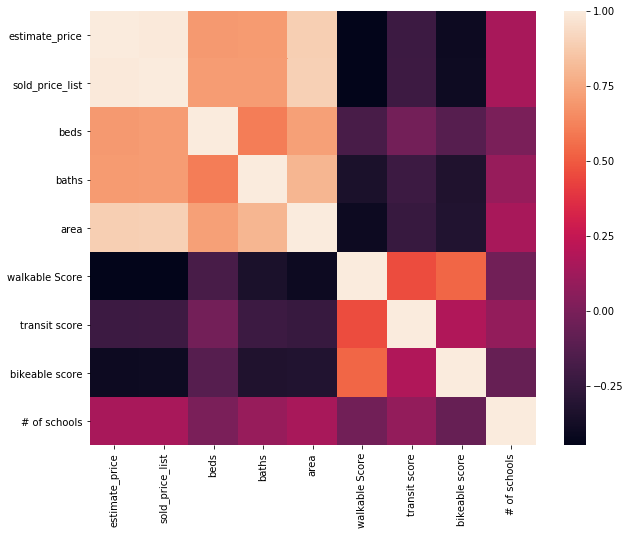

In [11]:
plt.subplots(figsize=(10,8))
sns.heatmap(data_new.corr())

#### Based on above heatmap, 'beds', 'baths', 'area', 'walkable Score', 'bikeable score' are correlated with the sold price

In [12]:
X = finaldata[['beds', 'baths', 'area', 'walkable Score', 'bikeable score']].values
y = data_new['sold_price_list'].values

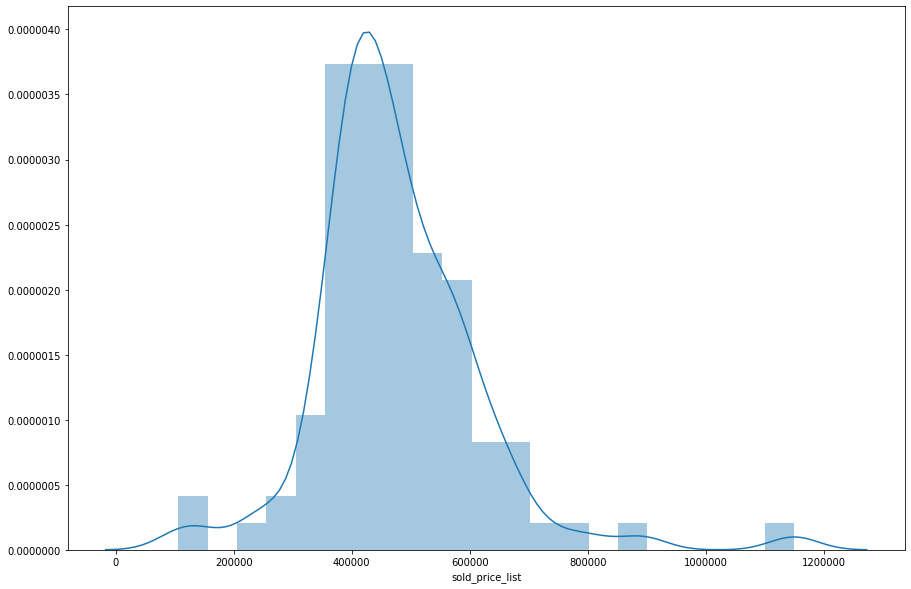

In [13]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data_new['sold_price_list'])

#### Prepare train and test data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Multi linear regression model

In [15]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# R^2 when the model is run on test data.
regressor.score(X_test, y_test)

0.8514924022773159

In [17]:
# Get the predictions for test data.
y_pred = regressor.predict(X_test)

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

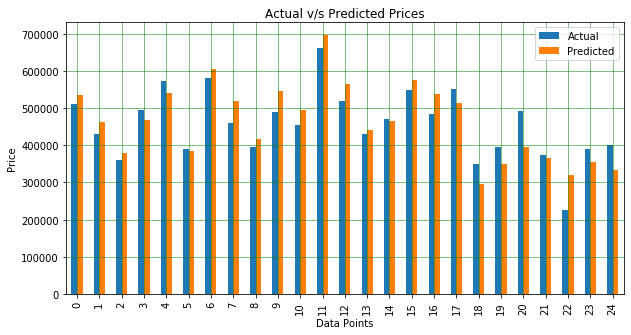

In [19]:
df1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("Data Points")
plt.ylabel("Price")
plt.title("Actual v/s Predicted Prices")
plt.show()

In [20]:
# Getting the error metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 42530.72152713523
Mean Squared Error (MSE): 2981106738.630386
Root Mean Squared Error (RMSE): 54599.5122563415


In [21]:
X = finaldata[['beds','baths','area', 'walkable Score', 'bikeable score']].values
y = data_new['sold_price_list'].values

X = X_test
y = y_test
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     55.59
Date:                Sat, 05 Sep 2020   Prob (F-statistic):           1.13e-17
Time:                        17:41:45   Log-Likelihood:                -601.49
No. Observations:                  49   AIC:                             1215.
Df Residuals:                      43   BIC:                             1226.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.225e+05    5.8e+04      2.114      0.0

### Findings:
About 85% of the variation in sold prices are explained by this model. F-statistic is greater than 1 (71.59) which demonstrates strong correlation between dependent and independent variables. Also, the second, fourth and fifth coefficient (the ones for baths,walkable Score and bikeable score) have a large p-value. Therefore, these three variables are not statistically significant. Removing these predictors would slightly reduce the R² value, but we might make better predictions.

In [23]:
# Redfin estimates vs Actual price
y_pred = data_new['estimate_price']
y_test = data_new['sold_price_list']

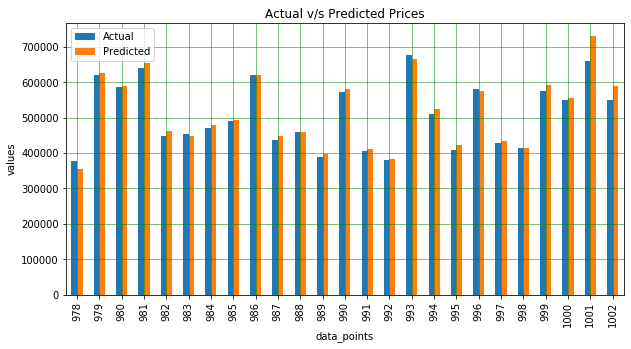

Mean Absolute Error: 9579.432989690722
Mean Squared Error: 328620729.53608245
Root Mean Squared Error: 18127.899203605542


In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel("data_points")
plt.ylabel("values")
plt.title("Actual v/s Predicted Prices")
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))